<a href="https://colab.research.google.com/github/Dulavinya/EN3150_Assignment1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Slope (m): -3.557272727272728
Intercept (b): 3.916727272727277
Linear model: y = -3.56x + 3.92


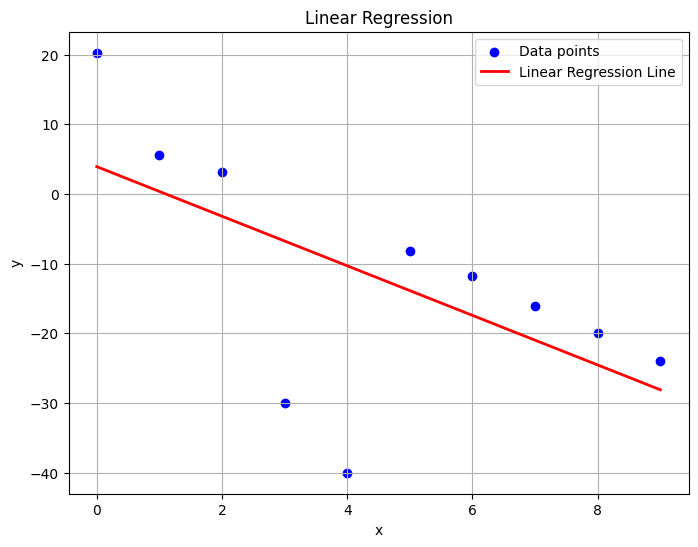

In [ ]:
x= np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1,1)
y= np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73,-16.08, -19.95, -24.03])

# Fit linear regression model
model = LinearRegression()
model.fit(x, y)

# Get predictions
y_pred = model.predict(x)


print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)
print(f"Linear model: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")


# Plotting
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred, color="red", linewidth=2, label="Linear Regression Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#defining the models
def model_1(x): return -4*x + 12
def model_2(x): return -3.55*x + 3.91

#defining the robust loss function
def robust_loss(y_true, y_pred, beta):
  residuals = y_true- y_pred
  squared_errors = residuals ** 2
  loss = np.mean(squared_errors / (squared_errors + beta ** 2))
  return loss

#calculating losses

beta_values = [1, 1e-6, 1e3]

y_hat_1 = model_1(x)
y_hat_2 = model_2(x)

for beta in beta_values:
  loss_1 = robust_loss(y, y_hat_1, beta)
  loss_2 = robust_loss(y, y_hat_2, beta)

  print(f"β = {beta}")
  print(f"Model 1 Loss:  {loss_1:.4f}")
  print(f"Model 2 Loss:  {loss_2:.4f}\n")






β = 1
Model 1 Loss:  0.9298
Model 2 Loss:  0.9491

β = 1e-06
Model 1 Loss:  1.0000
Model 2 Loss:  1.0000

β = 1000.0
Model 1 Loss:  0.0005
Model 2 Loss:  0.0004



Task 5:
The most suitable value for the hyperparameter β to mitigate the impact of outliers is β = 1. Large errors from outliers are capped to 1 in the loss function, reducing their influence, while small errors are treated approximately like normal squared errors, allowing the model to fit inliers effectively. If β is too large(1000), the loss behaves like MSE and outliers still dominates.
If β is too small, the loss stays near 1 for all errors and the model cannot learn properly. Therefore, β=1 can be considered to be the most suitable maintaining the right balance between limiting outlier impact and preserving accurate fitting of normal data points.
  


Task 6:
Using the robust estimator with the selected β Value of 1, the most suitable model for the provided dataset is model 1.
Both the models show extremely low robust loss values but model 1 yields the lowest loss,  indicating a marginally better fit when outliers are suppressed. Therefore, when using a robust estimator designed to reduce the effect of outliers, Model 1 proves to be the most appropriate choice for representing the true relationship between the variables.


Task 7:
This robust estimator reduces the impact of outliers by capping the maximum contribution any single data point can make to the total loss.
When the residual error is small, the term behaves like MSE,
so inliers influence  the fit normally.
When teh error is large, the fraction approaches 1, meaning the loss from that point is capped and cannot grow with the error size. This prevents extreme values from dominating the optimization, ensuring that model fitting is driven mainly by the majority of normal data points rather than a few extreme outliers.

Task 8:


**2- Loss function**

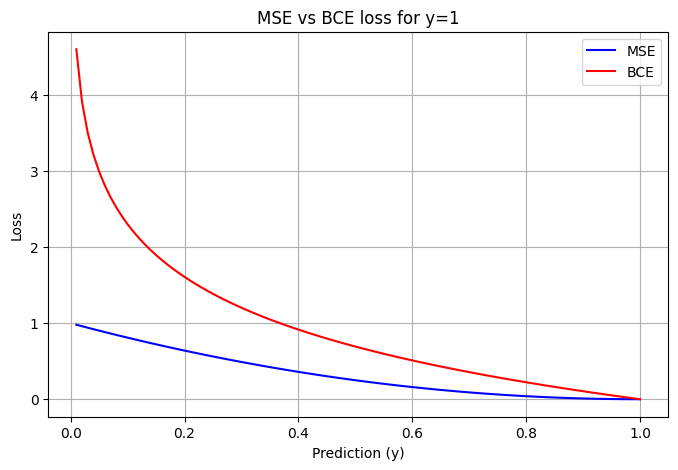

In [ ]:
y_hat = np.linspace(0.01,1.0,100)
y_true = 1

mse = (y_true-y_hat)**2
bce = -np.log(y_hat)

plt.figure(figsize=(8,5))
plt.plot(y_hat, mse, label ="MSE", color="blue")
plt.plot(y_hat, bce, label="BCE", color="red")

plt.title("MSE vs BCE loss for y=1")
plt.xlabel("Prediction (y)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


MSE and BCE values for y=1:
    True y  Prediction ŷ       MSE       BCE
0        1         0.005  0.990025  5.298317
1        1         0.010  0.980100  4.605170
2        1         0.050  0.902500  2.995732
3        1         0.100  0.810000  2.302585
4        1         0.200  0.640000  1.609438
5        1         0.300  0.490000  1.203973
6        1         0.400  0.360000  0.916291
7        1         0.500  0.250000  0.693147
8        1         0.600  0.160000  0.510826
9        1         0.700  0.090000  0.356675
10       1         0.800  0.040000  0.223144
11       1         0.900  0.010000  0.105361
12       1         1.000  0.000000 -0.000000


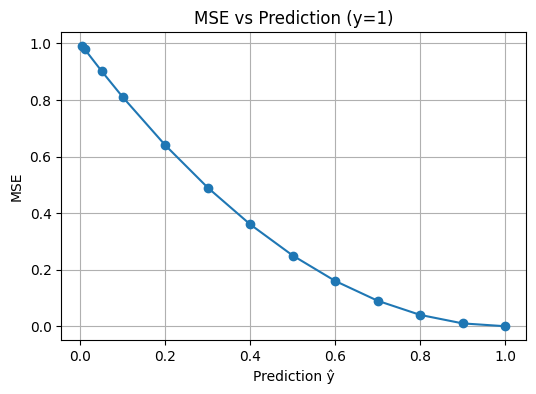

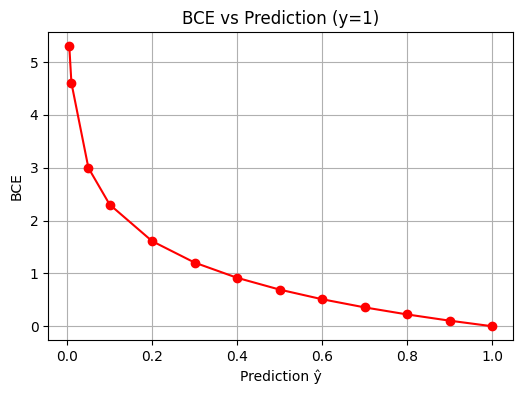

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Predictions and true label
preds = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                  0.6, 0.7, 0.8, 0.9, 1.0])
y = 1.0

# Mean Squared Error
mse = (y - preds) ** 2

# Binary Cross Entropy (natural log)
bce = -np.log(preds)  # since y=1, BCE simplifies to -log(pred)

# Create table
df = pd.DataFrame({
    "True y": [1] * len(preds),
    "Prediction ŷ": preds,
    "MSE": mse,
    "BCE": bce
})

print("MSE and BCE values for y=1:")
print(df.round(6))

# Plot MSE
plt.figure(figsize=(6,4))
plt.plot(preds, mse, marker='o')
plt.title("MSE vs Prediction (y=1)")
plt.xlabel("Prediction ŷ")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Plot BCE
plt.figure(figsize=(6,4))
plt.plot(preds, bce, marker='o', color='red')
plt.title("BCE vs Prediction (y=1)")
plt.xlabel("Prediction ŷ")
plt.ylabel("BCE")
plt.grid(True)
plt.show()


2-1
For Application 1 (Linear Regression with continuous target), the suitable choice is MSE because it measures the squared difference between predicted and actual values, penalizing larger deviations more heavily, and it aligns with the Gaussian noise assumption typically used in regression models.

For Application 2 (Logistic Regression with binary target), the suitable choice is BCE because it is derived from the likelihood function for Bernoulli-distributed outcomes. BCE penalizes confident wrong predictions much more strongly than MSE, which improves probability calibration and classification performance in binary tasks. This matches the probabilistic output nature of logistic regression.

TASK 3 - Data processing


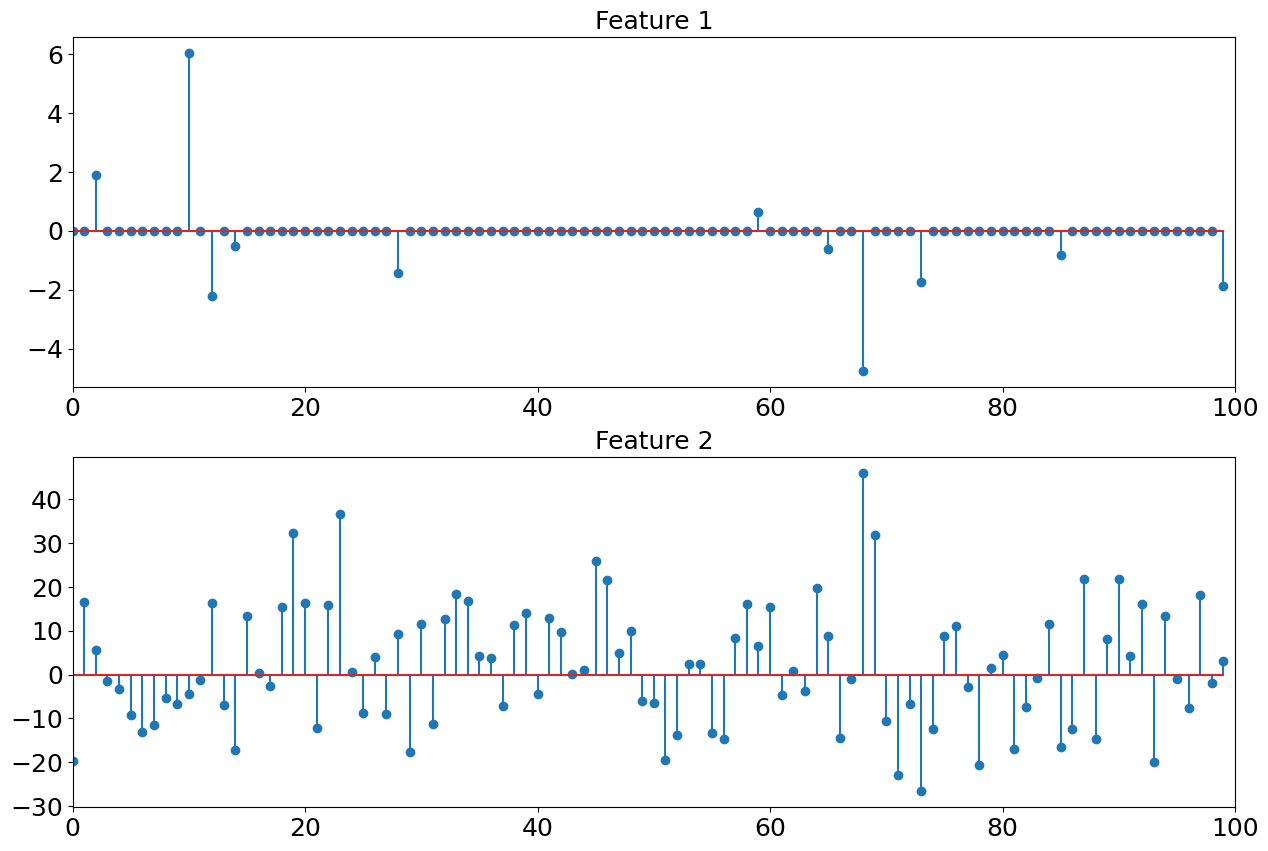

In [ ]:
# Function to generate sparse signal
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100  # Total length of the signal
num_nonzero = 10     # Number of non-zero elements in the signal

your_index_no = 220380

# Generate the sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1)[0] + 30
else:
    sparse_signal[10] = (your_index_no % 10) * 2 + 10

# Scale the sparse signal
sparse_signal = sparse_signal / 5

# Generate noise (epsilon)
epsilon = np.random.normal(0, 15, signal_length)

# Plotting
plt.figure(figsize=(15, 10))

# Plot Feature 1 - Sparse signal
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

# Plot Feature 2 - Noise
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(epsilon)

# Show plot
plt.show()


For Feature 1 (sparse signal), the most suitable scaling method is Max-Abs scaling. This feature contains mostly zeros with a few large spikes. Max-Abs scaling preserves the sparsity pattern because zeros remain exactly zero after scaling, and the relative proportions of the non-zero spikes are maintained. In contrast, Standard scaling and Min-Max scaling both shift the data, which would turn zero values into small non-zero values and distort the sparse structure. Min-Max scaling is also highly sensitive to the single large spike in the feature, which would compress the rest of the values into a narrow range.

For Feature 2 (Gaussian noise), the most suitable scaling method is Standard scaling (z-score normalization). This feature is dense, with values approximately following a Gaussian distribution with mean around zero and a standard deviation of about 15. Standard scaling preserves the Gaussian shape while centering the data to mean zero and scaling it to unit variance. This makes the feature well-conditioned for many algorithms that assume zero-mean, normalized inputs. Min-Max scaling would distort the distribution’s shape, and Max-Abs scaling would fail to center the data, leaving unequal variances across features.

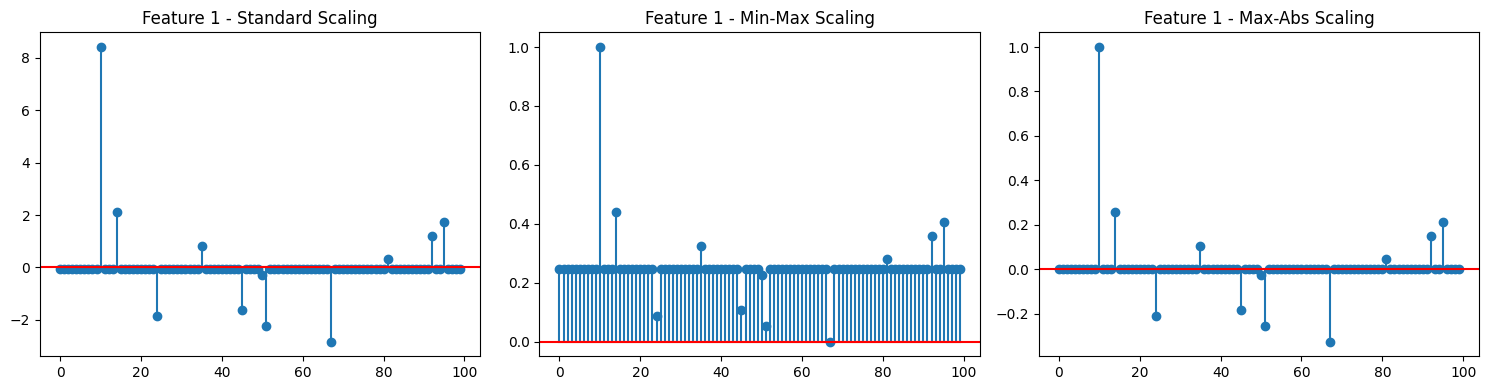

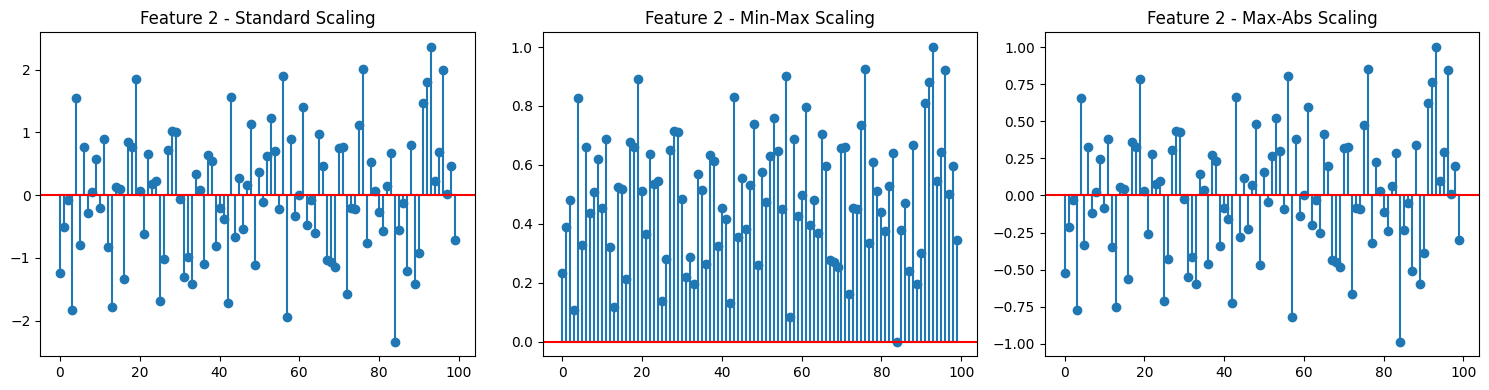

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# Function to generate sparse signal
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100
num_nonzero = 10
your_index_no = 220380

# Generate sparse signal (Feature 1)
sparse_signal = generate_signal(signal_length, num_nonzero)
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1)[0] + 30
else:
    sparse_signal[10] = (your_index_no % 10) * 2 + 10
sparse_signal = sparse_signal / 5

# Generate noise signal (Feature 2)
epsilon = np.random.normal(0, 15, signal_length)

# Reshape for scaling
feature1 = sparse_signal.reshape(-1, 1)
feature2 = epsilon.reshape(-1, 1)

# Apply scalers
scalers = {
    "Standard Scaling": StandardScaler(),
    "Min-Max Scaling": MinMaxScaler(),
    "Max-Abs Scaling": MaxAbsScaler()
}

scaled_f1 = {name: scaler.fit_transform(feature1).ravel() for name, scaler in scalers.items()}
scaled_f2 = {name: scaler.fit_transform(feature2).ravel() for name, scaler in scalers.items()}

x = np.arange(signal_length)

# --- Plot Feature 1  ---
plt.figure(figsize=(15, 4))
for i, (name, values) in enumerate(scaled_f1.items()):
    plt.subplot(1, 3, i+1)
    plt.stem(x, values)
    plt.axhline(0, color="r")  # reference line
    plt.title(f"Feature 1 - {name}")
plt.tight_layout()
plt.show()

# --- Plot Feature 2 ---
plt.figure(figsize=(15, 4))
for i, (name, values) in enumerate(scaled_f2.items()):
    plt.subplot(1, 3, i+1)
    plt.stem(x, values)
    plt.axhline(0, color="r")  # reference line
    plt.title(f"Feature 2 - {name}")
plt.tight_layout()
plt.show()
